# ParabolicSAR クラスのテスト

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from module.psar import ParabolicSAR

In [4]:
code = "7011"
symbol = "%s.T" % code
ticker = yf.Ticker(symbol)
# 日足で過去 1 年分のデータを取得
df = ticker.history(period="1y", interval="1d")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-04 00:00:00+09:00,1909.904364,2025.294419,1891.501639,2010.373291,110568400,0.0,0.0
2024-07-05 00:00:00+09:00,2000.425887,2054.141948,1954.170390,2025.294434,130394400,0.0,0.0
2024-07-08 00:00:00+09:00,1982.520494,2076.026228,1974.562560,2034.247070,96875200,0.0,0.0
2024-07-09 00:00:00+09:00,2020.818134,2026.786585,1940.741412,1989.483765,99453700,0.0,0.0
2024-07-10 00:00:00+09:00,1970.583629,2003.410110,1815.403898,1865.140991,177984700,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-30 00:00:00+09:00,3692.000000,3720.000000,3572.000000,3610.000000,53153600,0.0,0.0
2025-07-01 00:00:00+09:00,3615.000000,3675.000000,3598.000000,3634.000000,38509500,0.0,0.0
2025-07-02 00:00:00+09:00,3513.000000,3548.000000,3462.000000,3504.000000,40309400,0.0,0.0


In [6]:
psar = ParabolicSAR()
psar.calc(df)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,PSAR,Bear,Bull
Date,,,,,,,,,,
2024-07-04 00:00:00+09:00,1909.904364,2025.294419,1891.501639,2010.373291,110568400,0.0,0.0,2010.373291,NaN,NaN
2024-07-05 00:00:00+09:00,2000.425887,2054.141948,1954.170390,2025.294434,130394400,0.0,0.0,2025.294434,NaN,NaN
2024-07-08 00:00:00+09:00,1982.520494,2076.026228,1974.562560,2034.247070,96875200,0.0,0.0,2025.294419,2025.294419,NaN
2024-07-09 00:00:00+09:00,2020.818134,2026.786585,1940.741412,1989.483765,99453700,0.0,0.0,1974.562560,NaN,1974.562560
2024-07-10 00:00:00+09:00,1970.583629,2003.410110,1815.403898,1865.140991,177984700,0.0,0.0,2026.786585,2026.786585,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-30 00:00:00+09:00,3692.000000,3720.000000,3572.000000,3610.000000,53153600,0.0,0.0,3411.195221,NaN,3411.195221
2025-07-01 00:00:00+09:00,3615.000000,3675.000000,3598.000000,3634.000000,38509500,0.0,0.0,3435.899603,NaN,3435.899603
2025-07-02 00:00:00+09:00,3513.000000,3548.000000,3462.000000,3504.000000,40309400,0.0,0.0,3458.627635,NaN,3458.627635


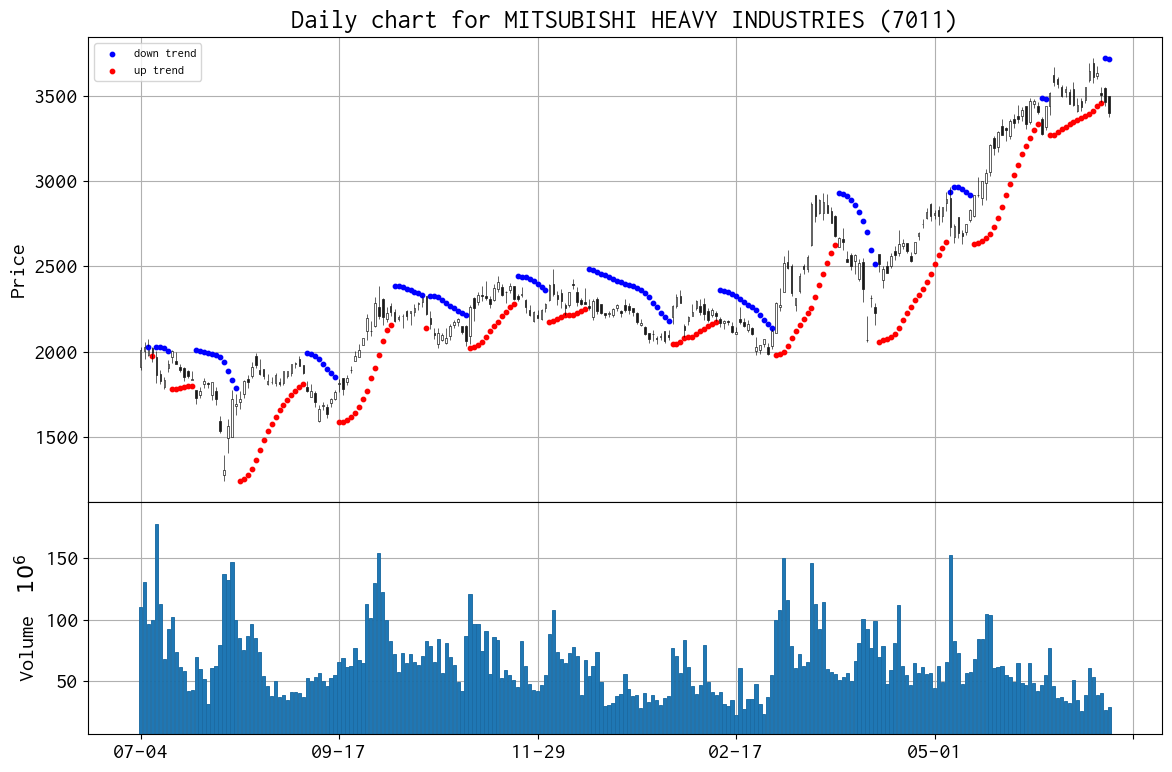

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

apds = [
    mpf.make_addplot(
        df["Bear"],
        type="scatter",
        marker="o",
        markersize=10,
        color="blue",
        label="down trend",
        ax=ax[0],
    ),
    mpf.make_addplot(
        df["Bull"],
        type="scatter",
        marker="o",
        markersize=10,
        color="red",
        label="up trend",
        ax=ax[0],
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=ax[1],
    datetime_format="%m-%d",
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title("Daily chart for %s (%s)" % (ticker.info["shortName"], code))
except KeyError:
    ax[0].set_title("Daily chart for %s" % code)

ax[0].legend(loc="best", fontsize=9)


plt.tight_layout()
#plt.savefig("report_daily_chart_%s.png" % code)
plt.show()